In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import csv
import os
from repast4py import parameters

params = parameters.init_params("model1.yaml", "")

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  PlannerPropMax1


Current folders are:
PlannerPropMax1.0
PlannerPropMax1.1


In [3]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

In [4]:
#names=["inv goods bought", "inv goods inventories", "grossInvestments","grossInvExpected"]
names= [' '] * len(params['investmentGoods'])
for i in range(len(params['investmentGoods'])):
    names[i] = "inv goods bought type "+str(params['investmentGoods'][i])

names.append("inv goods inventories")
names.append("grossInvestments")
names.append("grossInvExpected")

In [5]:
os.chdir("../"+folder+".0")
#planner info database from rank==0
plannerInfo=pd.read_csv('plannerInfo.csv', header=None)
#print(plannerInfo)
#planner info database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    plannerInfo=plannerInfo.add(pd.read_csv('plannerInfo.csv', header=None))
plannerInfo.columns=names
#pd.DataFrame(plannerInfo)

In [6]:
plannerInfo

inv goods bought type 2  inv goods bought type 4  \
0                   0.000000                 0.000000   
1                   0.000000                 0.000000   
2                1167.045071              1091.241741   
3                2717.801871              5348.062058   
4                5008.691378              5995.711827   
..                       ...                      ...   
259              8055.038979              9599.695118   
260              7425.096420             13417.670861   
261              7321.652437             10990.145238   
262              7378.982497             10622.673579   
263              7688.359208              9148.164821   

     inv goods bought type 6  inv goods bought type 8  inv goods inventories  \
0                   0.000000                 0.000000               0.000000   
1                   0.000000                 0.000000               0.000000   
2                   0.000000                 0.000000            2584.802778   
3                   0.000000                 0.000000            9099.393743   
4                   0.000000                 0.000000           12561.602037   
..                       ...                      ...                    ...   
259              7039.554185              8565.240889           37566.958467   
260              9508.290391             19760.778741           56373.740407   
261              6193.364093             13712.655764           44144.447048   
262             11660.961780             12240.167965           48612.525349   
263             11341.577072             25088.259451           62058.038138   

     grossInvestments  grossInvExpected  
0            0.000000      0.000000e+00  
1            0.000000      0.000000e+00  
2            0.000000      0.000000e+00  
3            0.000000      0.000000e+00  
4            0.000000      0.000000e+00  
..                ...               ...  
259      15624.086764      5.320005e+06  
260      16239.256605      5.311980e+06  
261      14962.860440      5.301781e+06  
262      14720.617891      5.313856e+06  
263      14838.688765      5.313032e+06  

[264 rows x 7 columns]

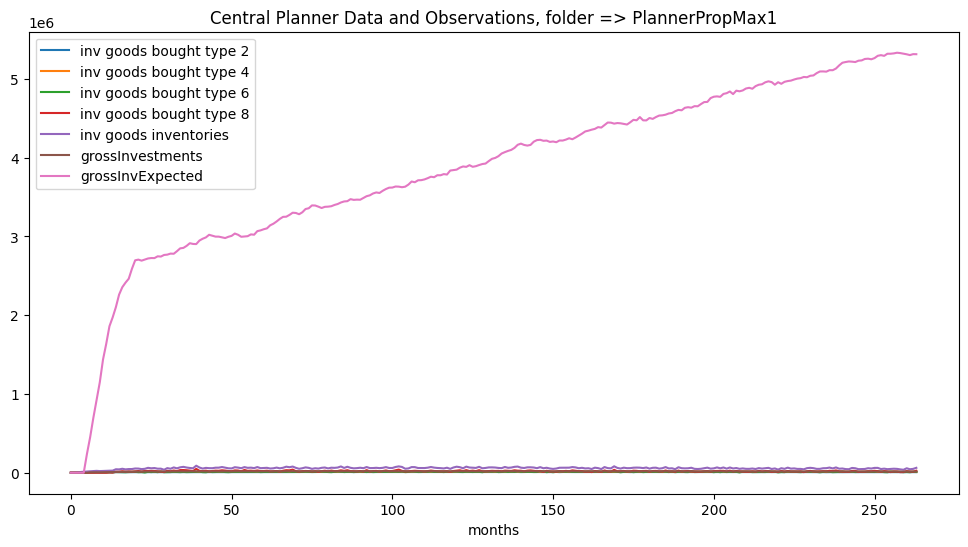

In [7]:
fig=plannerInfo.plot(figsize=(12,6), title="Central Planner Data and Observations, folder => " + folder,\
                     xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlot.jpg",dpi=180)


['inv goods bought type 2', 'inv goods bought type 4', 'inv goods bought type 6', 'inv goods bought type 8']


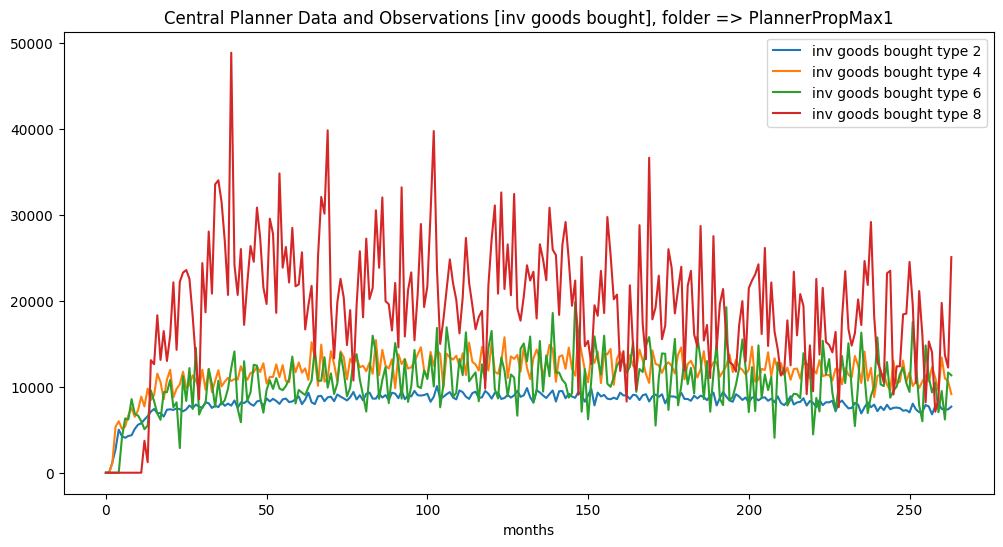

In [8]:
namesInvGoods= [' '] * len(params['investmentGoods'])
for i in range(len(params['investmentGoods'])):
    namesInvGoods[i] = "inv goods bought type "+str(params['investmentGoods'][i])
print(namesInvGoods)
    
fig=plannerInfo[namesInvGoods].plot(figsize=(12,6), \
        title="Central Planner Data and Observations [inv goods bought], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)

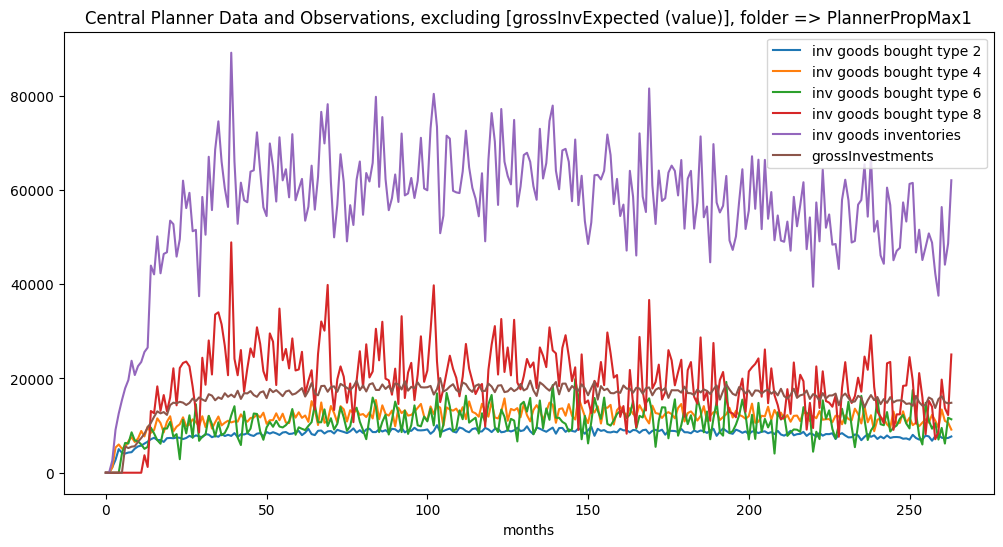

In [9]:
fig=plannerInfo[names[:-1]].plot(figsize=(12,6), \
        title="Central Planner Data and Observations, excluding [grossInvExpected (value)], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotAllButExpectedInv.jpg",dpi=180)